In [ ]:
!pip install pyLDAvis

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 31.8 MB/s eta 0:00:00


In [ ]:
import os
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import scipy.sparse as sp
from heapq import nlargest
import ast
import scipy

import pyLDAvis
import pyLDAvis.gensim

import gensim
from gensim.test.utils import common_texts
from gensim.corpora.dictionary import Dictionary
from gensim.models import ldamodel
from gensim.models.ldamulticore import LdaMulticore

/usr/local/lib/python3.9/dist-packages/google/rpc/__init__.py:20: DeprecationWarning: Deprecated call to `pkg_resources.declare_namespace('google.rpc')`.
Implementing implicit namespace packages (as specified in PEP 420) is preferred to `pkg_resources.declare_namespace`. See https://setuptools.pypa.io/en/latest/references/keywords.html#keyword-namespace-packages
  pkg_resources.declare_namespace(__name__)
/usr/local/lib/python3.9/dist-packages/pkg_resources/__init__.py:2349: DeprecationWarning: Deprecated call to `pkg_resources.declare_namespace('google')`.
Implementing implicit namespace packages (as specified in PEP 420) is preferred to `pkg_resources.declare_namespace`. See https://setuptools.pypa.io/en/latest/references/keywords.html#keyword-namespace-packages
  declare_namespace(parent)


## Topic Modelling

In [ ]:
df_lst = []

for year in range(2004, 2020):
    df_lst += [pd.read_csv(f'/content/drive/MyDrive/Uni stuff/Classes/Fourth Year MI/Thesis/Processed Data/processed_{year}_no_numbers.csv')]

df_full = pd.concat(df_lst)
df_full["processed"] = df_full["processed"].apply(ast.literal_eval)

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
poli_texts = df_full["processed"].tolist()
poli_dictionary = Dictionary(poli_texts)
poli_corpus = [poli_dictionary.doc2bow(text) for text in poli_texts]

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
model_dict = {}
for num_topics in range(30,70):
    lda = LdaMulticore(poli_corpus, id2word=poli_dictionary, num_topics=num_topics, passes=3, iterations=80)
    coherence_model_lda = gensim.models.CoherenceModel(model=lda, texts=poli_texts, dictionary=poli_dictionary, coherence='c_npmi').get_coherence()
    model_dict[num_topics] = (lda, coherence_model_lda)

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
lda, score = max(model_dict.values(), key=lambda sub: sub[1])
best_num_topics = next(key for key, val in model_dict.items() if val == (lda, score))
print(f"The best model used {best_num_topics} topics, having a score of {score}")

The best model used 54 topics, having a score of -0.32038463645675397


/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
lda_worst, score_worst = min(model_dict.values(), key=lambda sub: sub[1])
worst_num_topics = next(key for key, val in model_dict.items() if val == (lda_worst, score_worst))
print(f"The worst model used {worst_num_topics} topics, having a score of {score_worst}")

The worst model used 33 topics, having a score of -0.33136902319430456


/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
print('nPerplexity Score: ', lda.log_perplexity(poli_corpus))
print('nCoherence Score: ', score)

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


nPerplexity Score:  -24.940224246134225
nCoherence Score:  -0.32038463645675397


In [ ]:
pyLDAvis.enable_notebook()
plot = pyLDAvis.gensim.prepare(lda, poli_corpus, poli_dictionary)

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.9/dist-packages/pyLDAvis/_prepare.py:243: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(


In [ ]:
plot

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


PreparedData(topic_coordinates=              x         y  topics  cluster      Freq
topic                                               
37    -0.002368  0.094698       1        1  2.126084
6     -0.072969 -0.176507       2        1  2.102440
41    -0.090811 -0.152496       3        1  2.082161
34    -0.332661  0.025795       4        1  2.080179
1     -0.043675 -0.190739       5        1  2.075686
22    -0.057683  0.025628       6        1  2.039780
42    -0.100089  0.085282       7        1  2.036599
8      0.003629 -0.048515       8        1  2.035245
19     0.000777 -0.014713       9        1  2.030308
14     0.095787 -0.050050      10        1  2.000997
39     0.045329 -0.062539      11        1  1.997658
35    -0.043303  0.001626      12        1  1.962459
30     0.046962  0.014998      13        1  1.953600
48     0.045524 -0.025623      14        1  1.950736
4      0.048169  0.057043      15        1  1.943219
44     0.033485 -0.002159      16        1  1.939665
10     0.042145 -0.050001      17        1  1.934099
31    -0.002503 -0.020153      18        1  1.932891
17     0.022508 -0.003397      19        1  1.904914
43     0.049082  0.039797      20        1  1.902505
53     0.050826  0.024812      21        1  1.888490
0     -0.003248 -0.020036      22        1  1.879179
32    -0.014645 -0.009925      23        1  1.867682
33    -0.073221  0.230066      24        1  1.866504
21    -0.034740 -0.035638      25        1  1.856808
15     0.030529  0.009303      26        1  1.833026
46    -0.036605 -0.098251      27        1  1.829964
40     0.003048 -0.020407      28        1  1.813719
13    -0.004731  0.045352      29        1  1.811373
36     0.032112 -0.021937      30        1  1.801722
7     -0.071719 -0.000035      31        1  1.800793
28     0.045624 -0.002105      32        1  1.799820
26     0.050920 -0.004666      33        1  1.789531
2      0.042818  0.044503      34        1  1.788235
27    -0.028083  0.039868      35        1  1.787958
25    -0.077775  0.038744      36        1  1.782722
18     0.061872 -0.041002      37        1  1.780104
12     0.014269  0.072226      38        1  1.755083
52     0.034573  0.007300      39        1  1.753590
51     0.026914  0.005920      40        1  1.751144
16     0.023716 -0.020198      41        1  1.736879
29    -0.067239 -0.008736      42        1  1.734462
3     -0.022968  0.033408      43        1  1.729619
24     0.035068  0.018979      44        1  1.728072
9      0.025625  0.040644      45        1  1.725211
23     0.016479  0.036035      46        1  1.724149
49     0.011715 -0.047637      47        1  1.719487
20    -0.017562  0.020889      48        1  1.703761
45     0.021155 -0.006781      49        1  1.701369
47     0.054163  0.018006      50        1  1.677363
38     0.065322 -0.007926      51        1  1.673153
5      0.044840 -0.001151      52        1  1.635255
11     0.048790  0.030655      53        1  1.622492
50     0.024825  0.081750      54        1  1.620056, topic_info=             Term         Freq        Total Category  logprob  loglift
9906          pea  7441.000000  7441.000000  Default  30.0000  30.0000
10742      lentil  5390.000000  5390.000000  Default  29.0000  29.0000
3605       bushel  3854.000000  3854.000000  Default  28.0000  28.0000
6813      plastic  3802.000000  3802.000000  Default  27.0000  27.0000
4065        inmat  3479.000000  3479.000000  Default  26.0000  26.0000
...           ...          ...          ...      ...      ...      ...
9366     supersed   205.530323   207.008060  Topic54  -4.6956   4.1155
7703   shockingli   204.507591   205.985347  Topic54  -4.7006   4.1155
5302      creatur   203.835499   205.343751  Topic54  -4.7038   4.1153
4061       upheld   329.793464   334.092026  Topic54  -4.2227   4.1098
3376         curb   451.073771   550.171154  Topic54  -3.9095   3.9241

[1847 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
1098      6  0.995358     abdic
416

In [ ]:
lda.save('/content/drive/MyDrive/Uni stuff/Classes/Fourth Year MI/Thesis/lda_full_model')

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
lda = gensim.models.ldamulticore.LdaMulticore.load('/content/drive/MyDrive/Uni stuff/Classes/Fourth Year MI/Thesis/lda_full_model')

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## Coherence Score by Number of Topics

In [ ]:
x = model_dict.keys()
y = [value[1] for value in model_dict.values()]

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Text(0, 0.5, 'Coherence Score ($C_{NPMI}$)')

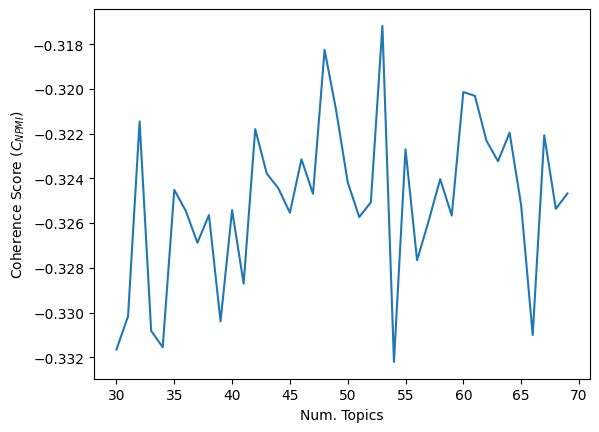

In [ ]:
plt.plot(x, y)
plt.xlabel("Num. Topics")
plt.ylabel("Coherence Score ($C_{NPMI}$)")

## Aggregation by Party

In [ ]:
year = 2019
reduced_df = pd.read_csv(f'/content/drive/MyDrive/Uni stuff/Classes/Fourth Year MI/Thesis/Processed Data/processed_{year}_no_numbers.csv')
reduced_df["processed"] = reduced_df["processed"].apply(ast.literal_eval)

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
colour_dict = {
    "Liberal": "red",
    "Conservative": "blue",
    "New Democratic Party": "orange",
    "Green Party": "green",
    "Bloc Québécois": "teal",
    "Independent": "grey",
    "People's Party": "purple"
}

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
party_list = reduced_df["speakerparty"].unique()

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
from scipy.spatial.distance import jensenshannon

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
party_scores = {}
for party in party_list:
    party_scores[party] = []

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
for i, row in reduced_df.iterrows():
    doc = row["processed"]
    party = row["speakerparty"]

    dict_doc = poli_dictionary.doc2bow(doc)
    weight = len(doc)

    scores = lda[poli_dictionary.doc2bow(doc)]

    party_scores[party] += [(scores, weight)]

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## Occurance of Topics by Party

In [ ]:
occurances_by_party = {}
for party in party_list:
    occurances_by_party[party] = np.zeros(lda.num_topics)

for party in party_list:
    scores = party_scores[party]

    for score in scores:
        if type(score) == tuple:
            occurances_by_party[party][score[0][0][0]] += 1
        else:
            topic = max(score, key=lambda item:item[0][0][1])[0][0][0]
            occurances_by_party[party][topic] += 1

    # normalize occurances
    occurances_by_party[party] /= np.linalg.norm(occurances_by_party[party])

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


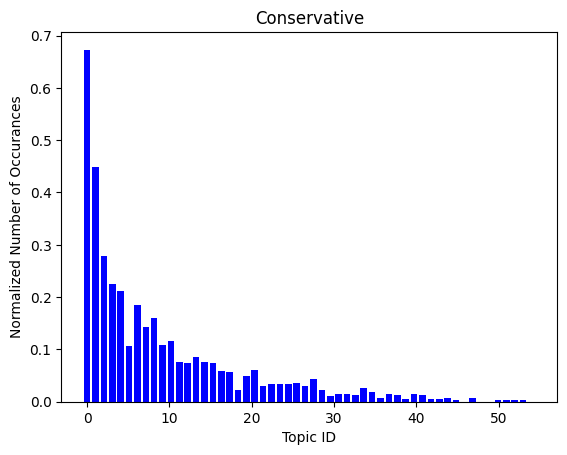

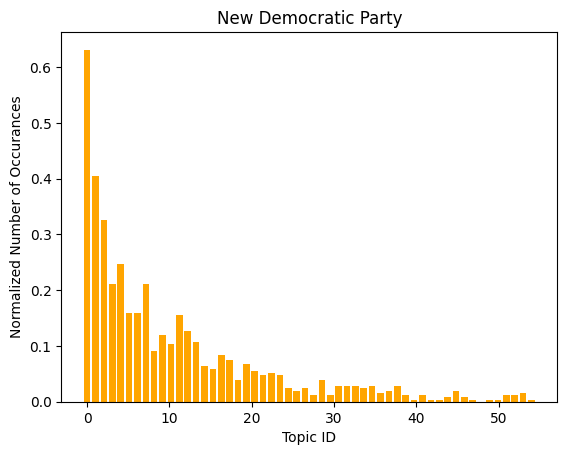

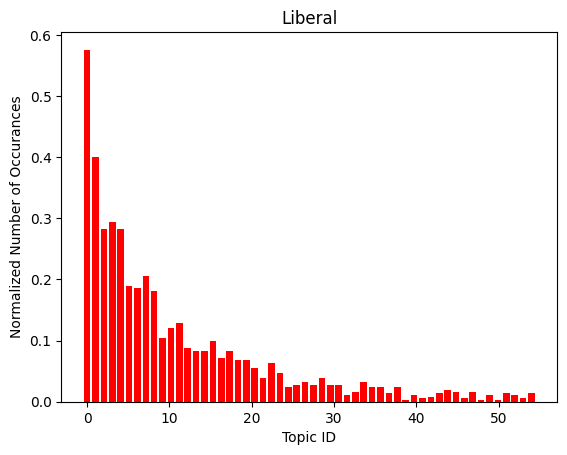

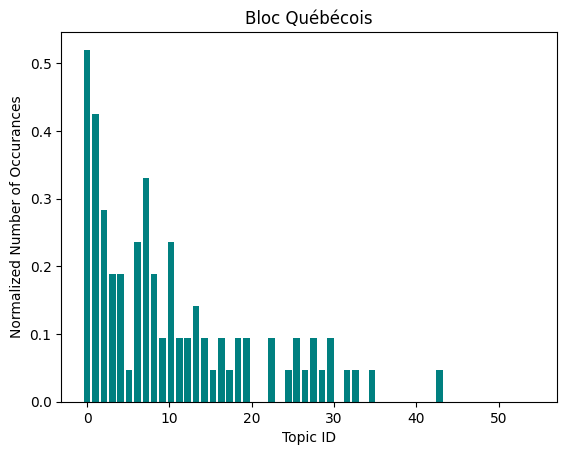

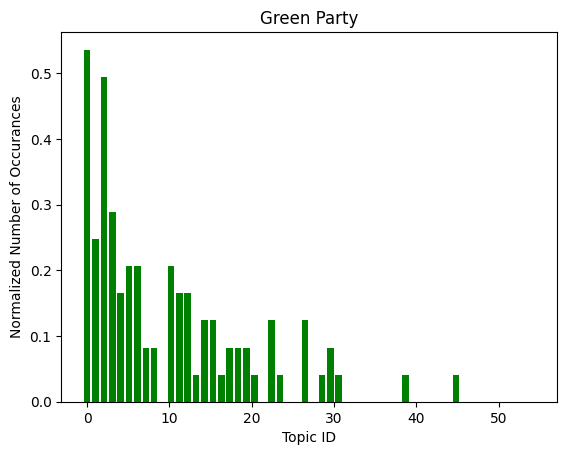

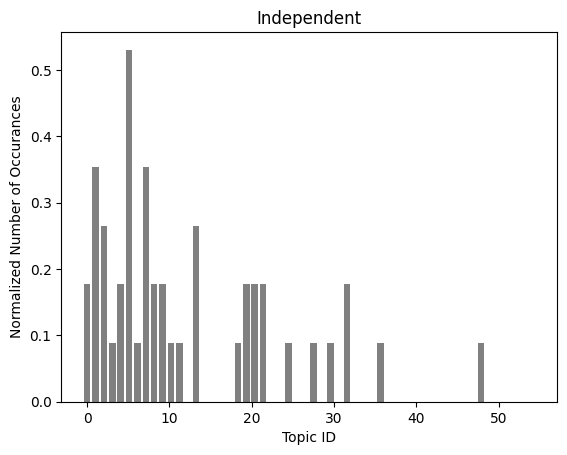

In [ ]:
for party in party_list:
    plt.title(party)
    colour = colour_dict[party] if party in colour_dict else None
    plt.bar(np.linspace(0, lda.num_topics, lda.num_topics), occurances_by_party[party], color=colour)
    plt.xlabel("Topic ID")
    plt.ylabel("Normalized Number of Occurances")
    plt.savefig(f"/content/drive/MyDrive/Uni stuff/Classes/Fourth Year MI/Thesis/Figures/LDA/lda_{party}_{year}.png")
    plt.show()

## Pariwise Jensen-Shannon Divergence

In [ ]:
js_matrix = np.zeros((len(party_list), len(party_list)))
party_order = []

for i in range(len(party_list)):
    party_order += [list(occurances_by_party.keys())[i]]
    for j in range(len(party_list)):
        party_1 = occurances_by_party[list(occurances_by_party.keys())[i]]
        party_2 = occurances_by_party[list(occurances_by_party.keys())[j]]

        js_matrix[i][j] = jensenshannon(party_1, party_2) ** 2

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
party_list

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


array(['Liberal', 'Conservative', 'New Democratic Party',
       'Bloc Québécois', 'Green Party', 'Independent'], dtype=object)

In [ ]:
pd.DataFrame(js_matrix, columns=party_order, index=party_order)

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Liberal,Conservative,New Democratic Party,Bloc Québécois,Green Party,Independent
Liberal,0.000000,0.008378,0.011408,0.059385,0.051533,0.457769
Conservative,0.008378,0.000000,0.009555,0.062068,0.048799,0.462300
New Democratic Party,0.011408,0.009555,0.000000,0.063487,0.053424,0.467013
Bloc Québécois,0.059385,0.062068,0.063487,0.000000,0.092989,0.489642
Green Party,0.051533,0.048799,0.053424,0.092989,0.000000,0.513615
Independent,0.457769,0.462300,0.467013,0.489642,0.513615,0.000000


In [ ]:
js_df = pd.DataFrame(js_matrix, columns=party_order, index=party_order)
js_df.to_csv(f'/content/drive/MyDrive/Uni stuff/Classes/Fourth Year MI/Thesis/LDA Processed Data/lda_{year}_no_numbers.csv')

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
def compare_parties_js(party_1, party_2, js_div):
    plt.suptitle(f"Topic Occurances of {party_1} vs {party_2} ({year})")
    plt.title(f"JS Divergence: {js_div:.4f}")
    colour_1 = colour_dict[party_1] if party_1 in colour_dict else None
    colour_2 = colour_dict[party_2] if party_2 in colour_dict else None

    plt.bar(np.linspace(0, lda.num_topics, lda.num_topics) - 0.2, occurances_by_party[party_1], 0.4, color=colour_1, label = party_1)
    plt.bar(np.linspace(0, lda.num_topics, lda.num_topics) + 0.2, occurances_by_party[party_2], 0.4, color=colour_2, label = party_2)

    plt.xlabel("Topic ID")
    plt.ylabel("Normalized Number of Occurances")

    plt.legend()
    plt.show()

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


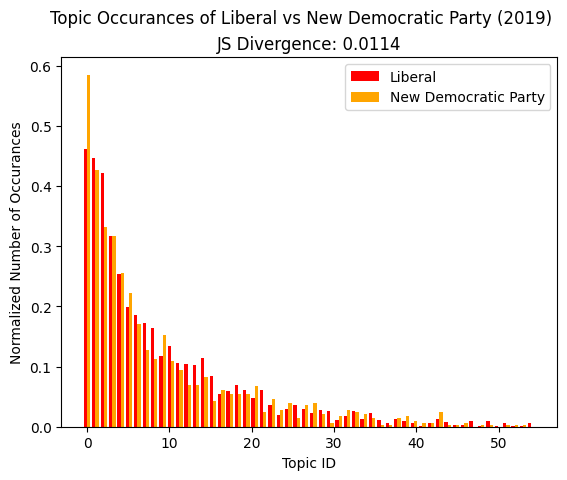

In [ ]:
compare_parties_js("Liberal", "New Democratic Party", js_matrix[0][2])

## Generalized Jensen-Shannon Divergence

In [ ]:
num_speeches_by_party = {key: len(value) for key, value in party_scores.items()}
total_num_speeches = sum(num_speeches_by_party.values())
norm_speeches_by_party = {key: value/total_num_speeches for key, value in num_speeches_by_party.items()}

M = np.sum(norm_speeches_by_party[party] * occurances_by_party[party] for party in party_list)
JSD = scipy.stats.entropy(M) - np.sum(norm_speeches_by_party[party] * scipy.stats.entropy(occurances_by_party[party]) for party in party_list)

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-87-8e28317c7227>:5: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  M = np.sum(norm_speeches_by_party[party] * occurances_by_party[party] for party in party_list)
<ipython-input-87-8e28317c7227>:6: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  JSD = scipy.stats.entropy(M) - np.sum(norm_speeches_by_party[party] * scipy.stats.entropy(occurances_by_party[party]) f

In [ ]:
pd.DataFrame({f"{year}": [JSD]}).to_csv(f'/content/drive/MyDrive/Uni stuff/Classes/Fourth Year MI/Thesis/LDA Processed Data/lda_{year}_overall_jsd.csv')

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
